In [1]:
import cv2
import matplotlib.pyplot as plt
from robot_core.perception.vision_model.tennis_YOLO import TennisBallDetectorHeight


collection_zone = (200, 150, 400, 350)  # Define a region for collection, x_min, y_min, x_max, y_max
camera_height = 0.02  # Camera height in meters (2 cm)

# Initialize the TennisBallDetector with camera height
detector = TennisBallDetectorHeight(
    collection_zone=collection_zone, 
    camera_height=camera_height, 
    cache=True, # Use the cache for the YOLO model if it exists
    windows=False,  # Path handling for Windows
    verbose=True   # Enable verbose logging for debugging
)


Using cache found in /Users/patrick/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-5 Python-3.12.4 torch-2.4.1 CPU

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


Horizontal Distance: 1.56 meters
Total Distance: 1.56 meters
Angle: 0.40 degrees
Cartesian Coordinates: (x: 1.56 meters, y: 0.01 meters)
In Collection Zone: True
Camera Height: 0.02 meters
Vertical Distance: 0.02 meters (from floor)
horizontal_distance: 1.5648027935907962
in_collection_zone: True
total_distance: 1.5649306000042174
angle: 0.007038560081284125
cartesian_coords: (1.5647640325465793, 0.011013867537253705)


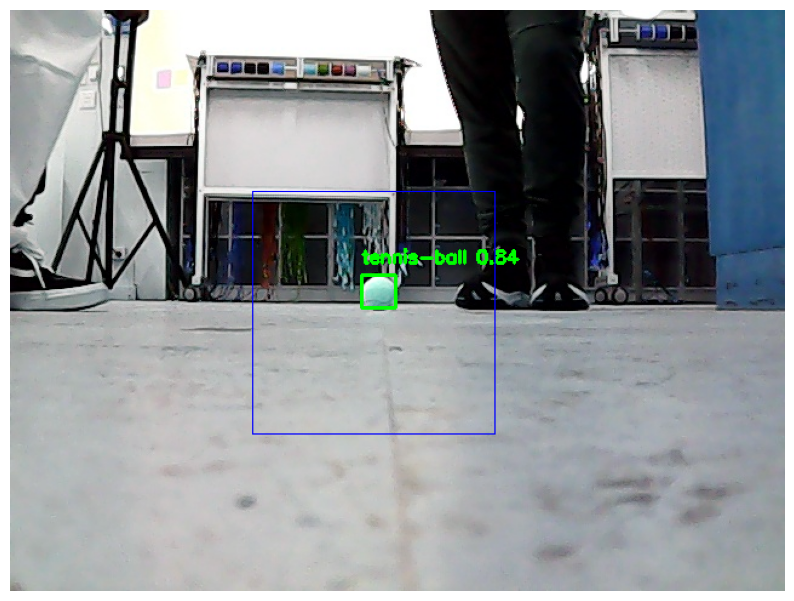

Horizontal Distance: 1.52 meters
Total Distance: 1.52 meters
Angle: 0.41 degrees
Cartesian Coordinates: (x: 1.52 meters, y: 0.01 meters)
In Collection Zone: True
Camera Height: 0.02 meters
Vertical Distance: 0.02 meters (from floor)
horizontal_distance: 1.52204900452721
in_collection_zone: True
total_distance: 1.5221804006694708
angle: 0.007205210387501721
cartesian_coords: (1.5220094960679276, 0.010966588408621495)


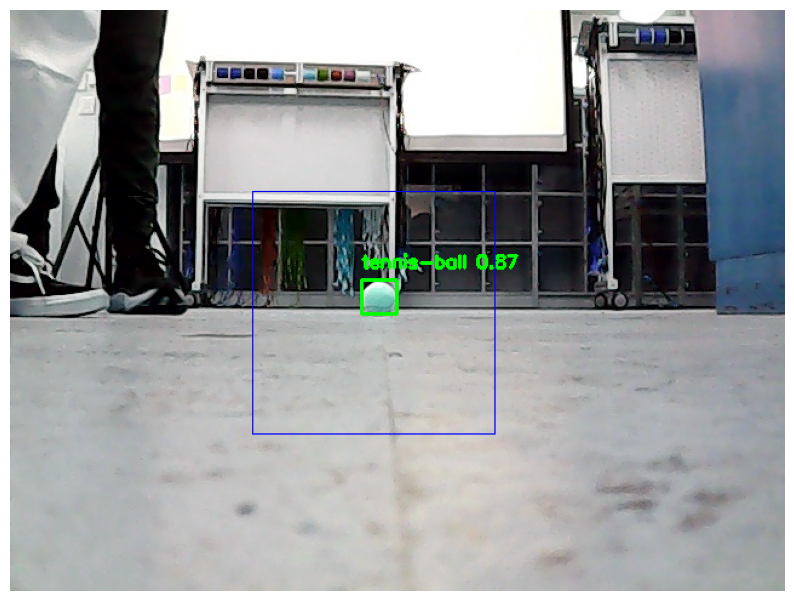

Horizontal Distance: 1.27 meters
Total Distance: 1.27 meters
Angle: -0.63 degrees
Cartesian Coordinates: (x: 1.27 meters, y: -0.01 meters)
In Collection Zone: True
Camera Height: 0.02 meters
Vertical Distance: 0.02 meters (from floor)
horizontal_distance: 1.273056485878338
in_collection_zone: True
total_distance: 1.2732135784058003
angle: -0.010948503360247299
cartesian_coords: (1.2729801861745476, -0.013937784756456536)


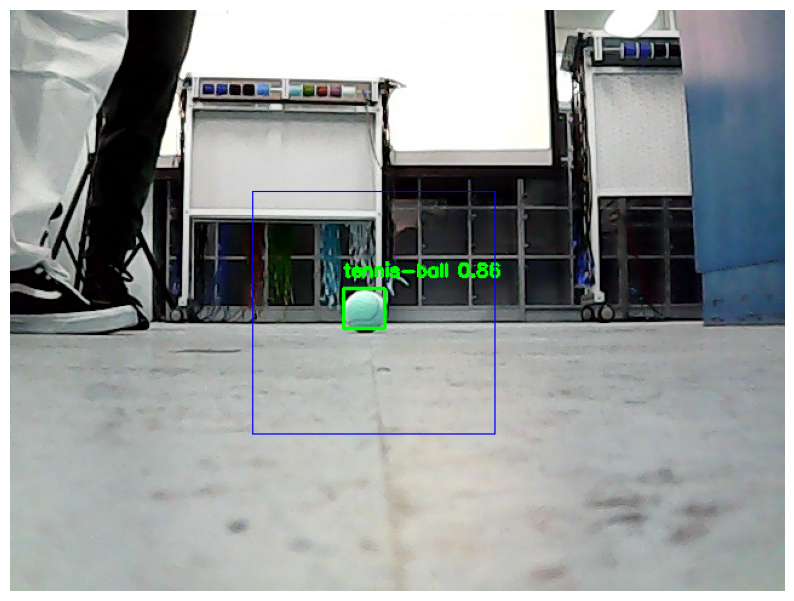

Horizontal Distance: 0.63 meters
Total Distance: 0.63 meters
Angle: 0.07 degrees
Cartesian Coordinates: (x: 0.63 meters, y: 0.00 meters)
In Collection Zone: True
Camera Height: 0.02 meters
Vertical Distance: 0.02 meters (from floor)
horizontal_distance: 0.6295783985436786
in_collection_zone: True
total_distance: 0.6298959913452562
angle: 0.001288864960297889
cartesian_coords: (0.6295778756244684, 0.0008114413129859787)


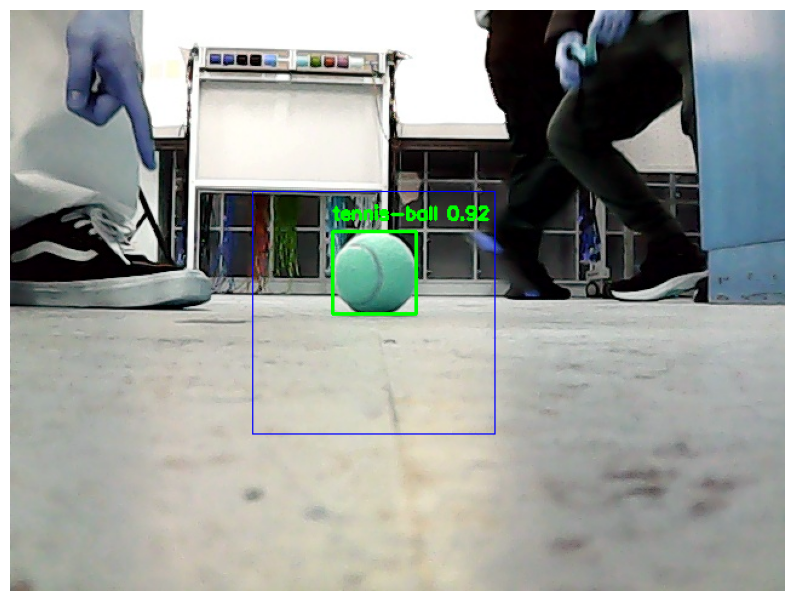

Horizontal Distance: 0.16 meters
Total Distance: 0.16 meters
Angle: 1.51 degrees
Cartesian Coordinates: (x: 0.16 meters, y: 0.00 meters)
In Collection Zone: True
Camera Height: 0.02 meters
Vertical Distance: 0.02 meters (from floor)
horizontal_distance: 0.15923846630711547
in_collection_zone: True
total_distance: 0.16048952972652872
angle: 0.02642096104904992
cartesian_coords: (0.1591828899664493, 0.004206743844310598)


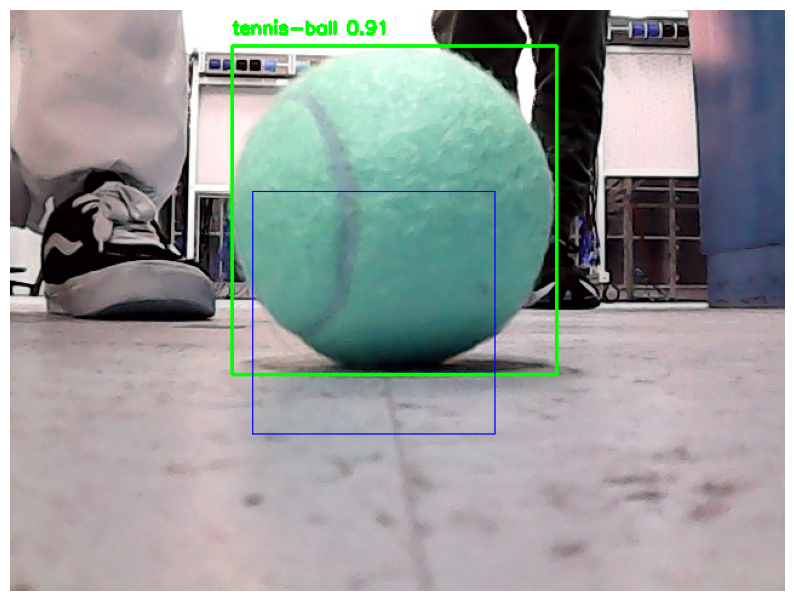

Horizontal Distance: 1.47 meters
Total Distance: 1.47 meters
Angle: -19.01 degrees
Cartesian Coordinates: (x: 1.39 meters, y: -0.48 meters)
In Collection Zone: False
Camera Height: 0.02 meters
Vertical Distance: 0.02 meters (from floor)
horizontal_distance: 1.467432279801809
in_collection_zone: False
total_distance: 1.467568565963558
angle: -0.3318506485112196
cartesian_coords: (1.3873706920478084, -0.47807955263859536)


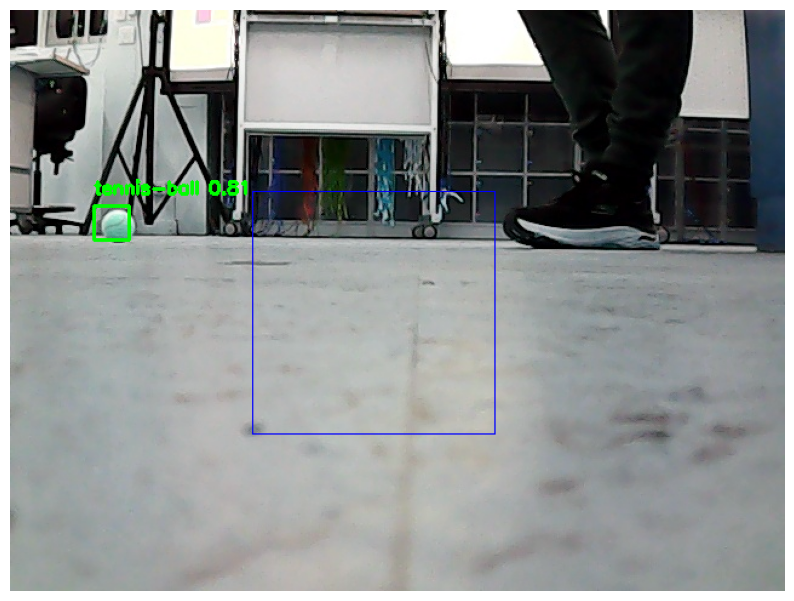

Horizontal Distance: 1.52 meters
Total Distance: 1.52 meters
Angle: -18.98 degrees
Cartesian Coordinates: (x: 1.44 meters, y: -0.49 meters)
In Collection Zone: False
Camera Height: 0.02 meters
Vertical Distance: 0.02 meters (from floor)
horizontal_distance: 1.5210387460679349
in_collection_zone: False
total_distance: 1.5211702294746356
angle: -0.3312598157225565
cartesian_coords: (1.4383449776790709, -0.4946944432933417)


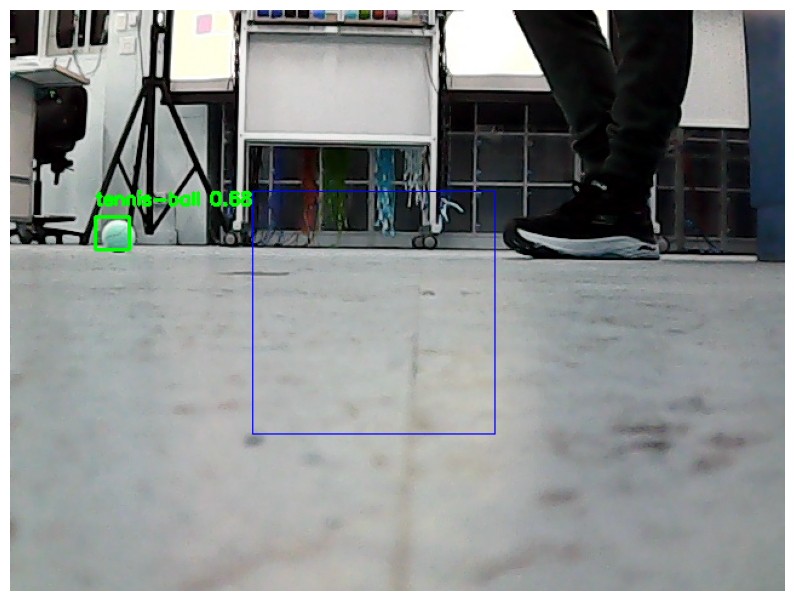

In [2]:

# Provide the image path for testing
import os
# path_pref =  "../../notebooks/scratchspace/camera/tennis_ball/"
path_pref = "/Users/patrick/Documents/Projects/ECE4191-E5-tennibot/notebooks/scratchspace/camera/tennis_ball/"
# list the files in the path_pref path using os.listdir
frames = [cv2.imread(os.path.abspath(f"{path_pref}image_{i}.jpg")) for i in [0, 5, 10, 15, 20, 22, 23]]

# Detect tennis ball and process results
%matplotlib inline
for frame in frames:  
    detection = detector.detect(frame=frame)  # Run detection

    # Print detection details
    for key, value in detection.items():
        if key != "annotated_frame":
            print(f"{key}: {value}")
    
    # Display the annotated frame
    plt.figure(figsize=(10, 10))
    plt.imshow(detection["annotated_frame"])
    plt.axis('off')
    plt.show()

